이미지 인식을 위한 CNN
===
## 1. 데이터 전처리

In [38]:
# mnist 자료 로드
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

# 자동완성용 라이브러리 로드
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense

(X_train, y_class_train), (X_test, y_class_test) = load_data()

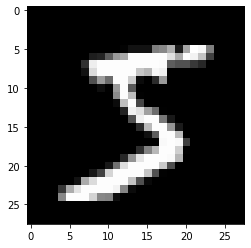

In [39]:
import matplotlib.pyplot as plt
import numpy as np

first_image = X_train[0]
first_image = np.array(first_image, dtype=float)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

In [40]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

In [41]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [42]:
y_train = to_categorical(y_class_train, 10)
y_test = to_categorical(y_class_test, 10)

In [43]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [46]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 자동완성
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 저장할 폴더 경로 및 파일명
model_dir = "./model/"
if not os.path.exists(model_dir) :
    os.mkdir(model_dir)

modelpath = "./model/{epoch:02d}_{val_loss:.4f}.hdf5"

# 체크 포인트 설정, 얼리 스탑 기준 지정
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

cols = 28*28
batch_size = 1000
model = Sequential()
model.add(Dense(units=512, input_shape=(cols, ), activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="CategoricalCrossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# validation_data, callbacks 지정
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=batch_size,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])

print(f"\n Test Accuracy : {model.evaluate(X_test, y_test)[1]}")


Epoch 1: val_loss improved from inf to 0.25819, saving model to ./model\01_0.2582.hdf5

Epoch 2: val_loss improved from 0.25819 to 0.19313, saving model to ./model\02_0.1931.hdf5

Epoch 3: val_loss improved from 0.19313 to 0.15579, saving model to ./model\03_0.1558.hdf5

Epoch 4: val_loss improved from 0.15579 to 0.12838, saving model to ./model\04_0.1284.hdf5

Epoch 5: val_loss improved from 0.12838 to 0.11282, saving model to ./model\05_0.1128.hdf5

Epoch 6: val_loss improved from 0.11282 to 0.10574, saving model to ./model\06_0.1057.hdf5

Epoch 7: val_loss improved from 0.10574 to 0.09404, saving model to ./model\07_0.0940.hdf5

Epoch 8: val_loss improved from 0.09404 to 0.08712, saving model to ./model\08_0.0871.hdf5

Epoch 9: val_loss improved from 0.08712 to 0.08279, saving model to ./model\09_0.0828.hdf5

Epoch 10: val_loss improved from 0.08279 to 0.07664, saving model to ./model\10_0.0766.hdf5

Epoch 11: val_loss improved from 0.07664 to 0.07427, saving model to ./model\11_0.

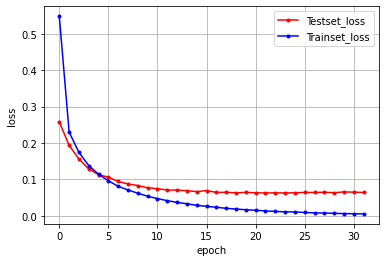

In [47]:
import matplotlib.pyplot as plt

y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()